Assignment 2- Halla Mohammed (900211491)

Part I

1. The probability of (winning/losing) of the most repeated countries in the dataset in terms of several factors.
1. The probability of (winning/losing) of the most repeated countries in the dataset in terms of several factors.
2. Comparing confidence intervals.
3. Drawing the corresponding graphs.
4. Description of the results.

In [304]:
#importing necessary libraries 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import math
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import norm,t


#importing a csv file from my laptop

import os
working_directory= os.getcwd()
print(working_directory)

/Users/halahatem


In [305]:
excercise1 = working_directory + '/Desktop/results.csv'
dataframe= pd.read_csv(excercise1)

In [306]:
dataframe.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [307]:
x=dataframe['home_score']-dataframe['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [308]:
values= ['win','lose','draw']

In [309]:
dataframe['type_of_result'] = np.select(conditions, values)

In [310]:
x=dataframe['type_of_result'].value_counts()

In [311]:
dataframe['type_of_result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: type_of_result, dtype: float64

In [312]:
dataframe.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,lose


In [313]:
x=dataframe['country'].unique()

France 

In [314]:
dffrance=dataframe[dataframe['country']=='France']

In [315]:
dffrance.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result
166,2/12/1905,France,Switzerland,1,0,Friendly,Paris,France,False,lose
185,4/22/1906,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,win
215,4/12/1908,France,Belgium,1,2,Friendly,Colombes,France,False,win
257,4/3/1910,France,Belgium,0,4,Friendly,Gentilly,France,False,win
277,1/1/1911,France,Hungary,0,3,Friendly,Maisons-Alfort,France,False,win


Tournament

In [316]:
conditions = [
    (dffrance['tournament']=='FIFA World Cup qualification'),
    (dffrance['tournament']=='FIFA World Cup')
    ]

In [317]:
#extracting unique values

y=dataframe['tournament'].unique()

In [318]:
values=['FIFA World Cup qualification','FIFA World Cup']

In [319]:
dffrance['typematch'] = np.select(conditions, values)

/var/folders/nn/br8l6_013s1_8h_kpkbg9m9w0000gn/T/ipykernel_2497/1704040084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffrance['typematch'] = np.select(conditions, values)


In [320]:
dffrance['typematch'].value_counts()

0                               673
FIFA World Cup                   82
FIFA World Cup qualification     63
Name: typematch, dtype: int64

In [321]:
dffrance=dffrance[dffrance['typematch']!="0"]

In [322]:
z=pd.crosstab(dffrance['typematch'],dffrance['type_of_result'],margins=True)
z

type_of_result,draw,lose,win,All
typematch,,,,
FIFA World Cup,22,39,21,82
FIFA World Cup qualification,13,44,6,63
All,35,83,27,145


In [323]:
z=np.array(z)
z

array([[ 22,  39,  21,  82],
       [ 13,  44,   6,  63],
       [ 35,  83,  27, 145]])

Confidence Interval (Tournament)

In [324]:
#FWCQ= FIFA World Cup qualification
CI_frwin_FWCQ=proportion_confint(count=z[0,2],nobs=z[0,3],alpha=(1-.95))
CI_frwin_FWCQ

(0.16162582903253128, 0.3505692929186882)

Description of Results:
This concludes that we are 95% confident that the proportion of France winning the FIFA World Cup qualification lies between 16% and 35% of the total.

In [325]:
#FWC= FIFA World Cup
CI_frwin_FWC=proportion_confint(count=z[1,2],nobs=z[1,3],alpha=(1-.95))
CI_frwin_FWC

(0.022752731952352376, 0.16772345852383808)

Description of Results:
This concludes that we are 95% confident that the proportion of France winning the FIFA World Cup lies between 2% and 16.7% of the total.

Plotting (Tournament)

In [326]:
ci_frwin = {}
ci_frwin['Typematch'] = ['FIFA World Cup qualification','FIFA World Cup']
ci_frwin['lb'] = [CI_frwin_FWCQ[0],CI_frwin_FWC[0]]
ci_frwin['ub'] = [CI_frwin_FWCQ[1],CI_frwin_FWCQ[1]]
df_ci= pd.DataFrame(ci_frwin)
df_ci

,Typematch,lb,ub
0,FIFA World Cup qualification,0.161626,0.350569
1,FIFA World Cup,0.022753,0.350569


([<matplotlib.axis.YTick at 0x7fc44edc0520>,
 [Text(0, 0, 'FIFA World Cup qualification'), Text(0, 1, 'FIFA World Cup')])

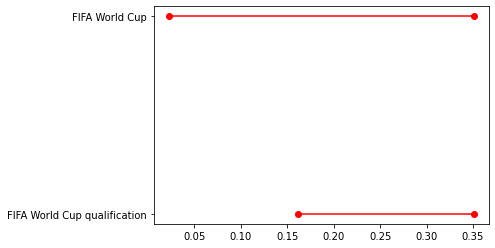

In [327]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Home/ Away

In [328]:
dffrance['home']=(dffrance['home_team']=='France')

In [329]:
dffrance['home'].value_counts()

False    78
True     67
Name: home, dtype: int64

In [330]:
x=pd.crosstab(dffrance['home'],dffrance['type_of_result'],margins=True)
x

type_of_result,draw,lose,win,All
home,,,,
False,23,33,22,78
True,12,50,5,67
All,35,83,27,145


In [331]:
x=np.array(x)
x

array([[ 23,  33,  22,  78],
       [ 12,  50,   5,  67],
       [ 35,  83,  27, 145]])

Confidence Interval (Home/Away)

In [332]:
CI_frwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frwin_home

(0.011702806050245207, 0.13755092529303836)

Description of Results:
This concludes that we are 95% confident that the proportion of France winning at home lies between 1.17% and 13.76% of the total.

In [333]:
CI_frwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frwin_away

(0.18218668801004265, 0.3819158760925214)

Description of Results:
This concludes that we are 95% confident that the proportion of France winning away from home lies between 18% and 38% of the total.

Plotting 

In [334]:
ci_frwin = {}
ci_frwin['home'] = ['Yes','No']
ci_frwin['lb'] = [CI_frwin_home[0],CI_frwin_away[0]]
ci_frwin['ub'] = [CI_frwin_home[1],CI_frwin_away[1]]
df_ci= pd.DataFrame(ci_frwin)
df_ci

,home,lb,ub
0,Yes,0.011703,0.137551
1,No,0.182187,0.381916


([<matplotlib.axis.YTick at 0x7fc44e164130>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

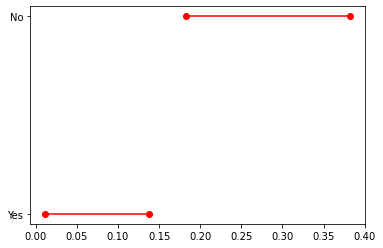

In [335]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Egypt

In [336]:
dfegy=dataframe[dataframe['country']=='Egypt']

In [337]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose


Tournament

In [338]:
conditions = [
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
    ]

In [339]:
values=['Friendly','Official']

In [340]:
dfegy['typematch'] = np.select(conditions, values)

/var/folders/nn/br8l6_013s1_8h_kpkbg9m9w0000gn/T/ipykernel_2497/2597929672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, values)


In [341]:
dfegy['typematch'].value_counts()

Official    226
Friendly    181
Name: typematch, dtype: int64

In [342]:
x=pd.crosstab(dfegy['typematch'],dfegy['type_of_result'],margins=True)
x

type_of_result,draw,lose,win,All
typematch,,,,
Friendly,37,99,45,181
Official,40,139,47,226
All,77,238,92,407


In [343]:
x=np.array(x)
x

array([[ 37,  99,  45, 181],
       [ 40, 139,  47, 226],
       [ 77, 238,  92, 407]])

Confidence Interval (Tournament)

In [344]:
CI_egywin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_friendly

(0.1856528084886489, 0.3115847605721246)

Description of Results:
This concludes that we are 95% confident that the proportion of Egypt winning friendly matches lies between 18% and 31.16% of the total.

In [345]:
CI_egywin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

Description of Results:
This concludes that we are 95% confident that the proportion of Egypt winning other official matches lies between 15.5% and 26% of the total.

Plotting (Tournament)

In [346]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,Official,0.155052,0.260877


([<matplotlib.axis.YTick at 0x7fc44d910ca0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

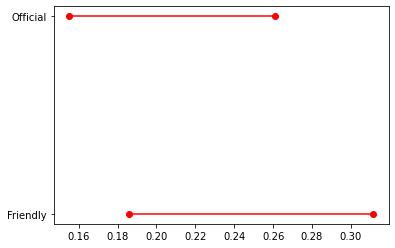

In [347]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Home/ Away

In [348]:
dfegy['home']=(dfegy['home_team']=='Egypt')

/var/folders/nn/br8l6_013s1_8h_kpkbg9m9w0000gn/T/ipykernel_2497/2175071764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


In [349]:
dfegy['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [350]:
x=pd.crosstab(dfegy['home'],dfegy['type_of_result'],margins=True)
x

type_of_result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [351]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose,Official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose,Friendly,True


In [352]:
x=np.array(x)
x

array([[ 33,  67,  49, 149],
       [ 44, 171,  43, 258],
       [ 77, 238,  92, 407]])

In [353]:
CI_egywin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

Description of Results:
This concludes that we are 95% confident that the proportion of Egypt winning home matches lies between 12.12% and 21.2% of the total.

In [354]:
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

Description of Results:
This concludes that we are 95% confident that the proportion of Egypt winning matches away from the country lies between 25.34% and 40% of the total.

Plotting (Home/Away)

In [355]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


([<matplotlib.axis.YTick at 0x7fc44e9e98e0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

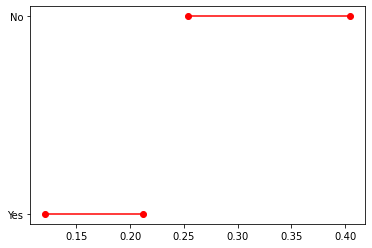

In [356]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

United States

In [357]:
dfus=dataframe[dataframe['country']=='United States']

In [358]:
dfus.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result
41,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False,win
48,1886-11-25,United States,Canada,3,2,Friendly,Newark,United States,False,lose
935,11/8/1925,United States,Canada,6,1,Friendly,New York,United States,False,lose
1022,11/6/1926,United States,Canada,6,2,Friendly,New York,United States,False,lose
1790,5/19/1935,United States,Scotland,1,5,Friendly,New York,United States,False,win


Tournament

In [359]:
conditions = [
    (dfus['tournament']=='USA Cup'),
    (dfus['tournament']=='Copa América')
    ]

In [360]:
values=['USA Cup','Copa América']

In [361]:
dfus['typematch'] = np.select(conditions, values)

/var/folders/nn/br8l6_013s1_8h_kpkbg9m9w0000gn/T/ipykernel_2497/4109917591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['typematch'] = np.select(conditions, values)


In [362]:
dfus=dfus[dfus['typematch']!="0"]

In [363]:
x=pd.crosstab(dfus['typematch'],dfus['type_of_result'],margins=True)
x

type_of_result,draw,lose,win,All
typematch,,,,
Copa América,6,16,10,32
USA Cup,11,17,9,37
All,17,33,19,69


In [364]:
x=np.array(x)
x

array([[ 6, 16, 10, 32],
       [11, 17,  9, 37],
       [17, 33, 19, 69]])

Confidence Interval of United States (Tournament)

In [365]:
#USC= USA Cup
CI_uswin_USC=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_USC

(0.15190409616559103, 0.47309590383440897)

Description of Results:
This concludes that we are 95% confident that the proportion of the United States winning USA Cup matches lies between 15.19% and 47.3% of the total.

In [366]:
#CA= Copa América
CI_uswin_CA=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_CA

(0.1049994075063076, 0.3814870789801789)

Description of Results:
This concludes that we are 95% confident that the proportion of the United States winning Copa América matches lies between 10.5% and 38.15% of the total.

Plotting (Tournament)

In [367]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_USC[0],CI_uswin_CA[0]]
ci_uswin['ub'] = [CI_uswin_USC[1],CI_uswin_CA[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,Typematch,lb,ub
0,Friendly,0.151904,0.473096
1,Official,0.104999,0.381487


([<matplotlib.axis.YTick at 0x7fc44d2791c0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

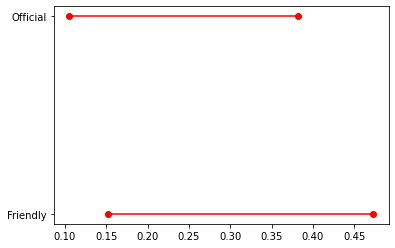

In [368]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Home/Away

In [369]:
dfus['home']=(dfus['home_team']=='United States')

In [370]:
dfus['home'].value_counts()

False    44
True     25
Name: home, dtype: int64

In [371]:
x=pd.crosstab(dfus['home'],dfus['type_of_result'],margins=True)
x

type_of_result,draw,lose,win,All
home,,,,
False,13,21,10,44
True,4,12,9,25
All,17,33,19,69


In [372]:
dfus.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,type_of_result,typematch,home
17069,5/30/1992,United States,Republic of Ireland,3,1,USA Cup,Washington,United States,False,lose,USA Cup,True
17070,5/31/1992,Italy,Portugal,0,0,USA Cup,New Haven,United States,True,draw,USA Cup,False
17085,6/3/1992,United States,Portugal,1,0,USA Cup,Chicago,United States,False,lose,USA Cup,True
17086,6/4/1992,Republic of Ireland,Italy,0,2,USA Cup,Foxborough,United States,True,win,USA Cup,False
17090,6/6/1992,United States,Italy,1,1,USA Cup,Chicago,United States,False,draw,USA Cup,True


In [373]:
x=np.array(x)
x

array([[13, 21, 10, 44],
       [ 4, 12,  9, 25],
       [17, 33, 19, 69]])

Plotting (Home/Away)

In [374]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.1718434574841548, 0.5481565425158452)

Description of Results:
This concludes that we are 95% confident that the proportion of the United States winning home matches lies between 17.18% and 54.8% of the total.

In [375]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.10344767077452685, 0.3510977837709277)

Description of Results:
This concludes that we are 95% confident that the proportion of the United States away matches lies between 10.34% and 35.12% of the total.

In [376]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.171843,0.548157
1,No,0.103448,0.351098


([<matplotlib.axis.YTick at 0x7fc44dacb820>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

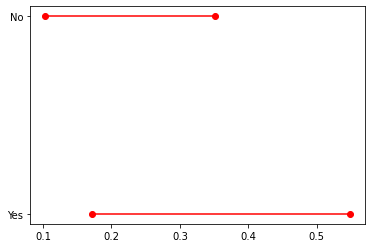

In [377]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

Part II

Using COVID-19 dataset that has been gathered during the pandemic to analyze the following:
1. The daily reported number of confirmed cases and deaths. 
2. The ratio between the deaths and confirmed cases.
3. Comparing between 2020 and 2021 in terms of several factors like regions, income, and continents.
4. Description of the results.

To find the daily reported number of cases and deaths:

In [378]:
DF=pd.read_csv('covid_data.csv',encoding='latin-1')

In [379]:
DF.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [380]:
x= DF['country'].unique()

In [381]:
#changed the data to categorical and making them strings
from pandas.api.types import CategoricalDtype
cat=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cat, ordered=True)
DF['weekdays'] = DF['weekdays'].astype(cat_type)

Daily Cases for all countries

In [382]:
#grouped the data by day to find the total number of confirmed cases per weekday
stats=DF.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})
stats

dcases                     
                 mean           std   size
weekdays                                  
Fri       2643.215039  13626.207863  17634
Sat       2174.297447  10922.667935  17472
Sun       1852.340706   9559.968071  17496
Mon       2116.600879  11700.105447  17521
Tue       2388.510716  11756.420050  17544
Wed       2601.990272  12848.605924  17578
Thu       2693.674338  14618.890740  17598

In [383]:
#to get lower bound and higher bound to get the mean confidence interval
ci95_hi = []
ci95_lo = []

In [384]:
#calculate the mean ci 
#i used the for loop to calculate the ci per day 
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])
x

(2477.6647308357324, 2909.6839451501755)

Because we can't calculate the exact mean, we estimate using the mean confidence interval. What we can conflude from the above interval is that the mean of confirmen daily cases lies between 2477.7 and 2909.7. Also, it is indicated that the level of confidence is 95 %. 

In [385]:
ci95_hi

[2844.351039005679,
 2336.2724620778636,
 1994.010612665055,
 2289.861880299358,
 2562.4914740100803,
 2791.950040008988,
 2909.6839451501755]

In [386]:
ci95_lo

[2442.079039252232,
 2012.3224326107813,
 1710.670800229321,
 1943.3398775911735,
 2214.529957818465,
 2412.030503852657,
 2477.6647308357324]

In [387]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

               dcases                           ci95_hi      ci95_lo
                 mean           std   size                          
weekdays                                                            
Fri       2643.215039  13626.207863  17634  2844.351039  2442.079039
Sat       2174.297447  10922.667935  17472  2336.272462  2012.322433
Sun       1852.340706   9559.968071  17496  1994.010613  1710.670800
Mon       2116.600879  11700.105447  17521  2289.861880  1943.339878
Tue       2388.510716  11756.420050  17544  2562.491474  2214.529958
Wed       2601.990272  12848.605924  17578  2791.950040  2412.030504
Thu       2693.674338  14618.890740  17598  2909.683945  2477.664731


In [388]:
df_ci= pd.DataFrame(stats)
df_ci

dcases                           ci95_hi      ci95_lo
                 mean           std   size                          
weekdays                                                            
Fri       2643.215039  13626.207863  17634  2844.351039  2442.079039
Sat       2174.297447  10922.667935  17472  2336.272462  2012.322433
Sun       1852.340706   9559.968071  17496  1994.010613  1710.670800
Mon       2116.600879  11700.105447  17521  2289.861880  1943.339878
Tue       2388.510716  11756.420050  17544  2562.491474  2214.529958
Wed       2601.990272  12848.605924  17578  2791.950040  2412.030504
Thu       2693.674338  14618.890740  17598  2909.683945  2477.664731

In [389]:
df_ci['weekdays']=df_ci.index
df_ci

dcases                           ci95_hi      ci95_lo weekdays
                 mean           std   size                                   
weekdays                                                                     
Fri       2643.215039  13626.207863  17634  2844.351039  2442.079039      Fri
Sat       2174.297447  10922.667935  17472  2336.272462  2012.322433      Sat
Sun       1852.340706   9559.968071  17496  1994.010613  1710.670800      Sun
Mon       2116.600879  11700.105447  17521  2289.861880  1943.339878      Mon
Tue       2388.510716  11756.420050  17544  2562.491474  2214.529958      Tue
Wed       2601.990272  12848.605924  17578  2791.950040  2412.030504      Wed
Thu       2693.674338  14618.890740  17598  2909.683945  2477.664731      Thu

([<matplotlib.axis.YTick at 0x7fc44ee1bbe0>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

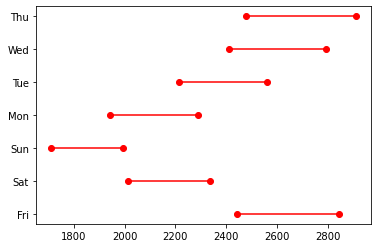

In [390]:
#plotting the confidence interval for the above calculations
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))

Daily Deaths for all countries

In [391]:
#now, i will do the same but for the number of confirmed deaths
stats=DF.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})
stats

ddeaths                   
               mean         std   size
weekdays                              
Fri       47.990756  208.404740  17634
Sat       40.258413  177.949619  17472
Sun       31.856367  139.320870  17496
Mon       37.954968  155.752300  17521
Tue       50.840002  230.863861  17544
Wed       51.346968  226.105877  17578
Thu       49.695534  224.874945  17598

In [392]:
ci95_hi = []
ci95_lo = []

In [393]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [394]:
x

(46.372767894404106, 53.01829927231938)

A confidence interval displays the probability that a parameter will fall between a pair of values around the mean. Confidence intervals measure the degree of uncertainty or certainty in a sampling method. Here, it indicates that the level of confidence is 95 %. Because the true population mean is unknown, this range describes possible values that the mean could be, which lies between 46.4 and 53. This is an estimate mean for the confirmed number of daily deaths.

In [395]:
ci95_hi

[51.06701191116553,
 42.89727352457211,
 33.9209739150721,
 40.26142611814076,
 54.25650741493992,
 54.68982229398611,
 53.01829927231938]

In [396]:
ci95_lo

[44.914501075110984,
 37.61955339850481,
 29.79176042420544,
 35.64851052931087,
 47.4234971450236,
 48.004113307333725,
 46.372767894404106]

In [397]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

            ddeaths                       ci95_hi    ci95_lo
               mean         std   size                      
weekdays                                                    
Fri       47.990756  208.404740  17634  51.067012  44.914501
Sat       40.258413  177.949619  17472  42.897274  37.619553
Sun       31.856367  139.320870  17496  33.920974  29.791760
Mon       37.954968  155.752300  17521  40.261426  35.648511
Tue       50.840002  230.863861  17544  54.256507  47.423497
Wed       51.346968  226.105877  17578  54.689822  48.004113
Thu       49.695534  224.874945  17598  53.018299  46.372768


In [398]:
df_ci= pd.DataFrame(stats)
df_ci

ddeaths                       ci95_hi    ci95_lo
               mean         std   size                      
weekdays                                                    
Fri       47.990756  208.404740  17634  51.067012  44.914501
Sat       40.258413  177.949619  17472  42.897274  37.619553
Sun       31.856367  139.320870  17496  33.920974  29.791760
Mon       37.954968  155.752300  17521  40.261426  35.648511
Tue       50.840002  230.863861  17544  54.256507  47.423497
Wed       51.346968  226.105877  17578  54.689822  48.004113
Thu       49.695534  224.874945  17598  53.018299  46.372768

In [399]:
df_ci['weekdays']=df_ci.index
df_ci

ddeaths                       ci95_hi    ci95_lo weekdays
               mean         std   size                               
weekdays                                                             
Fri       47.990756  208.404740  17634  51.067012  44.914501      Fri
Sat       40.258413  177.949619  17472  42.897274  37.619553      Sat
Sun       31.856367  139.320870  17496  33.920974  29.791760      Sun
Mon       37.954968  155.752300  17521  40.261426  35.648511      Mon
Tue       50.840002  230.863861  17544  54.256507  47.423497      Tue
Wed       51.346968  226.105877  17578  54.689822  48.004113      Wed
Thu       49.695534  224.874945  17598  53.018299  46.372768      Thu

([<matplotlib.axis.YTick at 0x7fc44e216550>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

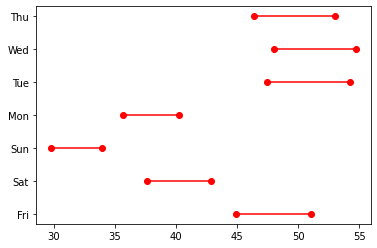

In [400]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))

To get the ratio between the deaths and confirmed cases:

In [401]:
x= DF['dcases'].sum()
x

289138394

In [402]:
y= DF['ddeaths'].sum()
y

5441088

In [403]:
ratio= y/x
ratio

0.01881828256955733

We can conclude from the above code that the ratio of deaths to confirmed cases is 18%, which is relatively high.

Now we will calculate the daily reported number for confirmed cases and deaths in 4 different countries: South Korea, Egypt, Japan, and United States.

In [404]:
DF['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [405]:
DF['country'].value_counts()

South Korea         710
Thailand            710
United States       710
Japan               710
China               710
                   ... 
Marshall Islands    430
Vanuatu             417
Samoa               409
Kiribati            228
Palau               132
Name: country, Length: 187, dtype: int64

We'll start with South Korea per weekday

In [406]:
dfsouthkorea=DF[DF['country']=='South Korea']

In [407]:
statsweekdays=dfsouthkorea.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [408]:
stats=pd.DataFrame(stats)

In [409]:
stats.shape

(7, 6)

In [410]:
statsweekdays.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [411]:
statsweekdays.columns=['mean','std','size']

In [412]:
statsweekdays.columns

Index(['mean', 'std', 'size'], dtype='object')

In [413]:
#we are calculating the lober bound
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [414]:
x=dfsouthkorea['dcases']

In [415]:
get_ci_lb(x)

795.69347356921

In [416]:
#get the upper bound
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [417]:
get_ci_ub(x)

993.7515968533253

In [418]:
ci_dcases=statsw=dfsouthkorea.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsw

dcases                                           
                 mean          std size   get_ci_lb    get_ci_ub
weekdays                                                        
Fri        960.705882  1423.739718  102  681.056866  1240.354898
Sat        865.712871  1280.278379  101  612.969859  1118.455884
Sun        734.099010  1080.646080  101  520.765918   947.432102
Mon        734.712871  1069.319852  101  523.615718   945.810024
Tue       1013.069307  1545.732896  101  707.922243  1318.216371
Wed        988.294118  1494.979861  102  694.652210  1281.936025
Thu        964.196078  1434.233649  102  682.485859  1245.906298

In [419]:
statsw.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [420]:
statsw.columns=['mean','std','size','lb','ub']

In [421]:
statsw['weekdays']=statsw.index

In [422]:
statsw

,mean,std,size,lb,ub,weekdays
weekdays,,,,,,
Fri,960.705882,1423.739718,102,681.056866,1240.354898,Fri
Sat,865.712871,1280.278379,101,612.969859,1118.455884,Sat
Sun,734.099010,1080.646080,101,520.765918,947.432102,Sun
Mon,734.712871,1069.319852,101,523.615718,945.810024,Mon
Tue,1013.069307,1545.732896,101,707.922243,1318.216371,Tue
Wed,988.294118,1494.979861,102,694.652210,1281.936025,Wed
Thu,964.196078,1434.233649,102,682.485859,1245.906298,Thu


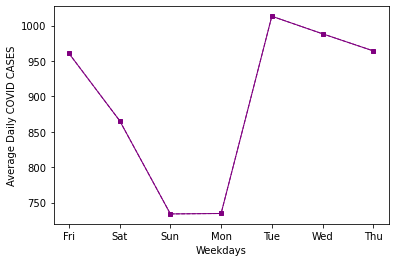

In [423]:
plt.plot( 'weekdays', 'mean', data=statsw, marker='s', color='purple', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsw, marker='o', color='purple',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.show()

After drawing plotting the graph, it is evident that the average daily cases was at its lowest during sundays and mondays and highest on tuesday reaching 1000 cases.

In [424]:
statsweekdays=dfsouthkorea.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

In [425]:
statsweekdays=pd.DataFrame(stats)

In [426]:
statsweekdays.shape

(7, 6)

In [427]:
statsweekdays.columns

MultiIndex([( 'ddeaths', 'mean'),
            ( 'ddeaths',  'std'),
            ( 'ddeaths', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

In [428]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [429]:
x=dfsouthkorea['ddeaths']

In [430]:
get_ci_lb(x)

6.855949683991252

In [431]:
ci_ddeaths=statsw=dfsouthkorea.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsw

ddeaths                                     
              mean        std size get_ci_lb  get_ci_ub
weekdays                                               
Fri       9.049020  17.251418  102  5.660520  12.437520
Sat       7.455446  13.362279  101  4.817564  10.093327
Sun       6.138614  10.153846  101  4.134117   8.143110
Mon       8.237624  14.519744  101  5.371244  11.104003
Tue       7.455446  13.259355  101  4.837883  10.073009
Wed       8.656863  16.159168  102  5.482901  11.830825
Thu       8.441176  15.643664  102  5.368469  11.513884

In [432]:
statsw.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [433]:
statsw.columns=['mean','std','size','lb','ub']

In [434]:
statsw['weekdays']=statsw.index

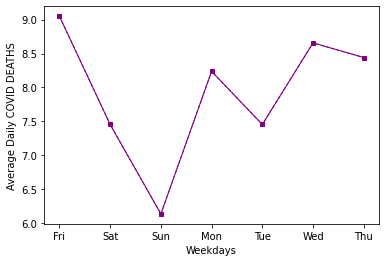

In [435]:
plt.plot( 'weekdays', 'mean', data=statsw, marker='s', color='purple', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsw, marker='o', color='purple',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Weekdays")
plt.ylabel("Average Daily COVID DEATHS")
plt.show()

On the other hand, through looking at the graph, it is clear that the average daily Covid deaths was at its lowest during sundays and highest on fridays reaching 1000 cases.

Next, we have Egypt but we will calculate it by months this time

In [436]:
dfegy=DF[DF['country']=='Egypt']

In [437]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
DF['month'] = DF['month'].astype(cat_type)

In [438]:
stats=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [439]:
stats=pd.DataFrame(stats)

In [440]:
stats.shape

(12, 3)

In [441]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [442]:
stats.columns=['mean','std','size']

In [443]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [444]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [445]:
x=dfegy['dcases']

In [446]:
get_ci_lb(x)

529.7945911276133

In [447]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [448]:
get_ci_ub(x)

592.694491841819

In [449]:
ci_dcases=statsm=dfegy.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                          
              mean         std size   get_ci_lb    get_ci_ub
month                                                       
Apr     504.133333  354.246465   60  412.621768   595.644899
Aug     145.806452   60.683224   62  130.395798   161.217105
Dec     792.709677  300.346870   62  716.435854   868.983501
Feb     374.409091  288.087868   44  286.822374   461.995808
Jan     899.645161  251.335970   31  807.454383   991.835939
Jul     463.661290  437.595552   62  352.532828   574.789752
Jun    1032.633333  454.674216   60  915.178529  1150.088138
Mar     329.290323  310.292849   62  250.490694   408.089951
May     879.774194  346.475245   62  791.785956   967.762431
Nov     598.616667  370.082496   60  503.014220   694.219113
Oct     497.580645  362.321547   62  405.568201   589.593089
Sep     339.033333  225.855584   60  280.688649   397.378017

In [450]:
statsm.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month')

In [451]:
statsm.columns=['mean','std','size','lb','ub']

In [452]:
statsm['month']=statsm.index

In [453]:
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Apr,504.133333,354.246465,60,412.621768,595.644899,Apr
Aug,145.806452,60.683224,62,130.395798,161.217105,Aug
Dec,792.709677,300.346870,62,716.435854,868.983501,Dec
Feb,374.409091,288.087868,44,286.822374,461.995808,Feb
Jan,899.645161,251.335970,31,807.454383,991.835939,Jan
Jul,463.661290,437.595552,62,352.532828,574.789752,Jul
Jun,1032.633333,454.674216,60,915.178529,1150.088138,Jun
Mar,329.290323,310.292849,62,250.490694,408.089951,Mar
May,879.774194,346.475245,62,791.785956,967.762431,May


Through observing the table, we can get that the month with the highest estimated mean is June while the lowest is August.

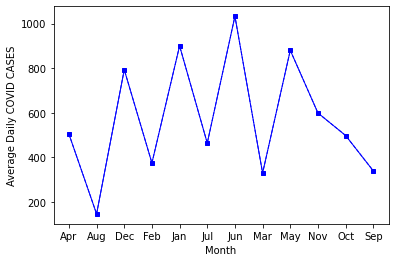

In [454]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='blue', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

This graph illustrates the mean we calculated after finding the confidence interval, lower bound, and upper bound,

Now we will do the same but for deaths

In [455]:
stats=dfegy.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size]})

In [456]:
stats=pd.DataFrame(stats)

In [457]:
stats.columns=['mean','std','size']

In [458]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [459]:
x=dfegy['ddeaths']

In [460]:
get_ci_lb(x)

29.98105462075952

In [461]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [462]:
get_ci_ub(x)

33.34354508811966

In [463]:
ci_dcases=statsm=dfegy.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

ddeaths                                      
            mean        std size  get_ci_lb  get_ci_ub
month                                                 
Apr    28.166667  17.826058   60  23.561707  32.771626
Aug    13.354839   7.503216   62  11.449379  15.260299
Dec    36.435484  15.919491   62  32.392690  40.478278
Feb    31.181818  24.163467   44  23.835453  38.528184
Jan    54.354839   3.638208   31  53.020333  55.689344
Jul    35.596774  27.745010   62  28.550861  42.642687
Jun    51.116667  23.279504   60  45.102933  57.130400
Mar    21.822581  20.717083   62  16.561427  27.083735
May    37.483871  20.947821   62  32.164120  42.803621
Nov    36.783333  27.679211   60  29.633035  43.933632
Oct    26.709677  16.823468   62  22.437316  30.982038
Sep    18.400000   7.962199   60  16.343146  20.456854

In [464]:
statsm.columns=['mean','std','size','lb','ub']

In [465]:
statsm['month']=statsm.index

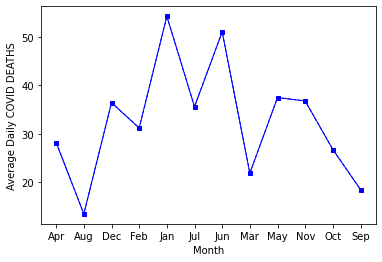

In [466]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='blue', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='blue',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID DEATHS")
plt.show()

Unlike the last one, the highest average of daily deaths occured on Jan while the lowest took place August. Knowing that, we can conclude that August was the least month in both deaths and cases. Also, we can get that Covid wasn't as bas as the rest of the months.

The next country is Japan and we are going to calculate it by days like we did in South Korea.

In [467]:
dfjapan=DF[DF['country']=='Japan']

In [468]:
stats=dfjapan.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [469]:
stats=pd.DataFrame(stats)

In [470]:
stats.shape

(7, 3)

In [471]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [472]:
stats.columns=['mean','std','size']

In [473]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [474]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [475]:
x=dfjapan['dcases']

In [476]:
get_ci_lb(x)

2125.3916111398644

In [477]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [478]:
get_ci_ub(x)

2754.3154311136564

In [479]:
ci_ddeaths=statsw=dfjapan.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsw

dcases                                            
                 mean          std size    get_ci_lb    get_ci_ub
weekdays                                                         
Fri       2673.098039  4696.199364  102  1750.676957  3595.519121
Sat       2719.465347  4648.056145  101  1801.880756  3637.049937
Sun       2292.396040  4011.712370  101  1500.433693  3084.358386
Mon       1700.762376  3082.632093  101  1092.212131  2309.312622
Tue       2262.237624  3887.670349  101  1494.762728  3029.712520
Wed       2666.500000  4580.092283  102  1766.884513  3566.115487
Thu       2756.823529  4716.551949  102  1830.404820  3683.242239

In [480]:
statsw.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [481]:
statsw.columns=['mean','std','size','lb','ub']

In [482]:
statsw['weekdays']=statsw.index

In [483]:
statsw

,mean,std,size,lb,ub,weekdays
weekdays,,,,,,
Fri,2673.098039,4696.199364,102,1750.676957,3595.519121,Fri
Sat,2719.465347,4648.056145,101,1801.880756,3637.049937,Sat
Sun,2292.396040,4011.712370,101,1500.433693,3084.358386,Sun
Mon,1700.762376,3082.632093,101,1092.212131,2309.312622,Mon
Tue,2262.237624,3887.670349,101,1494.762728,3029.712520,Tue
Wed,2666.500000,4580.092283,102,1766.884513,3566.115487,Wed
Thu,2756.823529,4716.551949,102,1830.404820,3683.242239,Thu


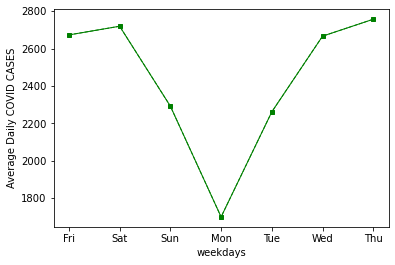

In [484]:
plt.plot( 'weekdays', 'mean', data=statsw, marker='s', color='green', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsw, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID CASES")
plt.show()

The shape of this graph shows that the average daily cases in Japan were high, then low, and then high. This is also shown in the table.

Now, we will compute the same thing but for deaths

In [485]:
stats=dfjapan.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

In [486]:
stats=pd.DataFrame(stats)

In [487]:
stats.columns=['mean','std','size']

In [488]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [489]:
x=dfjapan['ddeaths']

In [490]:
get_ci_lb(x)

23.688763297929274

In [491]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [492]:
get_ci_ub(x)

28.111236702070723

In [493]:
ci_ddeaths=statsw=dfjapan.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsw

ddeaths                                      
               mean        std size  get_ci_lb  get_ci_ub
weekdays                                                 
Fri       28.686275  31.542830  102  22.490675  34.881874
Sat       23.346535  27.007938  101  18.014829  28.678240
Sun       16.861386  18.954171  101  13.119595  20.603177
Mon       23.099010  25.410433  101  18.082672  28.115348
Tue       31.138614  36.701779  101  23.893222  38.384005
Wed       30.049020  33.656205  102  23.438314  36.659726
Thu       28.029412  31.470387  102  21.848041  34.210782

In [494]:
statsw.columns=['mean','std','size','lb','ub']

In [495]:
statsw['weekdays']=statsw.index

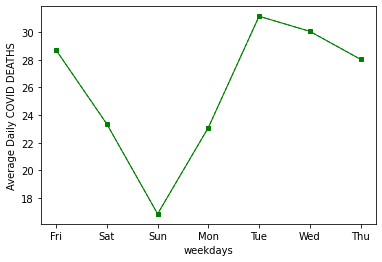

In [496]:
plt.plot( 'weekdays', 'mean', data=statsw, marker='s', color='green', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsw, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("weekdays")
plt.ylabel("Average Daily COVID DEATHS")
plt.show()

Here, Sun is the lowest according to the average daily Covid deaths and Tue is the highest.

Lastly, we will look at the confirmed cases and deaths per month in the US.

In [497]:
dfus=DF[DF['country']=='United States']

In [498]:
stats=dfus.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [499]:
stats=pd.DataFrame(stats)

In [500]:
stats.shape

(12, 3)

In [501]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [502]:
stats.columns=['mean','std','size']

In [503]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [504]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [505]:
x=dfus['dcases']

In [506]:
get_ci_lb(x)

71642.2273804623

In [507]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [508]:
get_ci_ub(x)

82752.31909841094

In [509]:
ci_dcases=statsm=dfus.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                                  
                mean            std size      get_ci_lb      get_ci_ub
month                                                                 
Jan    150053.024390   96139.362790   41  119707.697286  180398.351494
Feb     42262.649123   46506.630379   57   29922.779102   54602.519143
Mar     32362.080645   28088.831049   62   25228.853207   39495.308083
Apr     46206.983333   19424.943033   60   41188.988453   51224.978214
May     26359.209677    9226.362611   62   24016.152296   28702.267059
Jun     20927.733333   10905.385581   60   18110.573513   23744.893153
Jul     51912.387097   28977.563351   62   44553.463914   59271.310280
Aug     93187.225806   66340.454536   62   76339.904900  110034.546713
Sep     89110.316667   66304.148991   60   71982.138755  106238.494579
Oct     71428.387097   29855.299548   62   63846.560657   79010.213537
Nov    116959.483333   49303.330529   60  104223.082522  129695.884144
Dec    206309.548387  104452.758335   62  179783.514589  232835.582185

In [510]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [511]:
statsm.columns=['mean','std','size','lb','ub']

In [512]:
statsm['month']=statsm.index

In [513]:
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Jan,150053.024390,96139.362790,41,119707.697286,180398.351494,Jan
Feb,42262.649123,46506.630379,57,29922.779102,54602.519143,Feb
Mar,32362.080645,28088.831049,62,25228.853207,39495.308083,Mar
Apr,46206.983333,19424.943033,60,41188.988453,51224.978214,Apr
May,26359.209677,9226.362611,62,24016.152296,28702.267059,May
Jun,20927.733333,10905.385581,60,18110.573513,23744.893153,Jun
Jul,51912.387097,28977.563351,62,44553.463914,59271.310280,Jul
Aug,93187.225806,66340.454536,62,76339.904900,110034.546713,Aug
Sep,89110.316667,66304.148991,60,71982.138755,106238.494579,Sep


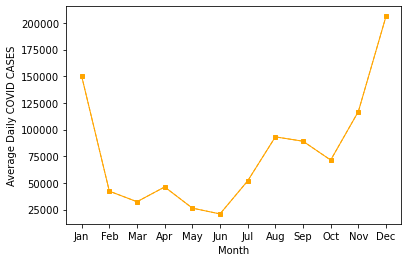

In [514]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='orange', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='orange',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

During December, the US was at it peak and then follows Jan. With this information we can predict that it is probable that these two months account for the highest number of daily deaths, too.

Now for deaths

In [515]:
stats=dfus.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size]})

In [516]:
stats=pd.DataFrame(stats)

In [517]:
stats.columns=['mean','std','size']

In [518]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [519]:
x=dfus['ddeaths']

In [520]:
get_ci_lb(x)

1095.4251914837605

In [521]:
get_ci_ub(x)

1236.7128366852535

In [522]:
ci_dcases=statsm=dfus.groupby("month").agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

ddeaths                                            
              mean          std size    get_ci_lb    get_ci_ub
month                                                         
Jan    2357.414634  1603.225498   41  1851.374228  2863.455040
Feb    1154.175439  1343.239370   57   797.766060  1510.584817
Mar     687.435484   656.579103   62   520.695613   854.175355
Apr    1411.483333   734.926342   60  1221.631728  1601.334939
May     965.983871   529.435192   62   831.532507  1100.435235
Jun     503.683333   245.604718   60   440.236907   567.129760
Jul     567.338710   380.578806   62   470.689790   663.987630
Aug     927.016129   468.429692   62   808.057261  1045.974997
Sep    1370.183333   930.381469   60  1129.840315  1610.526352
Oct    1168.403226   737.480279   62   981.118303  1355.688149
Nov    1226.083333   571.936683   60  1078.336421  1373.830245
Dec    2051.258065  1003.319604   62  1796.462594  2306.053535

In [523]:
statsm.columns=['mean','std','size','lb','ub']

In [524]:
statsm['month']=statsm.index

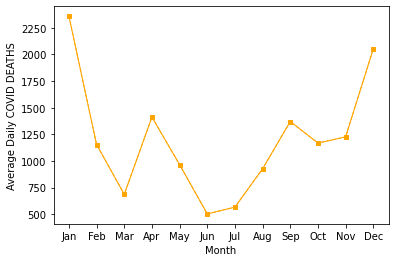

In [525]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='orange', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='orange',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID DEATHS")
plt.show()

Comparing between 2020 and 2021 in terms of several factors like regions, income, and continents:

We will do the same graph now but only on the year 2021. 

In [526]:
DF['date'][0]

'2020-02-24'

In [527]:
DF['date'] = pd. to_datetime(DF['date'],format='%Y-%m-%d')

In [528]:
DF['date'][0]

Timestamp('2020-02-24 00:00:00')

In [529]:
DF['year'] = pd. DatetimeIndex(DF['date']). year

In [530]:
DF['year'][0]

2020

Now, let's calculate it by country, by year, by month the following statistics on the daily COVID cases: mean, std, size, CI(95%) LB, and UB.

In [531]:
statsdcases=DF.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [532]:
statsdcases

dcases                                  \
                               mean          std  size    get_ci_lb   
country     year month                                                
Afghanistan 2020 Jan            NaN          NaN   NaN          NaN   
                 Feb       0.833333     2.041241   6.0    -1.308818   
                 Mar       5.258065    10.871883  31.0     1.270225   
                 Apr      55.366667    40.385627  30.0    40.286426   
                 May     430.741935   266.692078  31.0   332.918491   
...                             ...          ...   ...          ...   
Zimbabwe    2021 Aug     513.322581   386.841948  31.0   371.427809   
                 Sep     201.566667   135.119789  30.0   151.112108   
                 Oct      69.580645    58.035492  31.0    48.293055   
                 Nov      54.933333    82.622087  30.0    24.081739   
                 Dec    2536.548387  2572.199964  31.0  1593.057823   

                                     
                          get_ci_ub  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb       2.975485  
                 Mar       9.245904  
                 Apr      70.446908  
                 May     528.565379  
...                             ...  
Zimbabwe    2021 Aug     655.217353  
                 Sep     252.021225  
                 Oct      90.868235  
                 Nov      85.784928  
                 Dec    3480.038951  

[4488 rows x 5 columns]

In [533]:
statsdcases=statsdcases.reset_index()

In [534]:
statsdcases

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
0     Afghanistan  2020   Jan          NaN          NaN   NaN          NaN   
1     Afghanistan  2020   Feb     0.833333     2.041241   6.0    -1.308818   
2     Afghanistan  2020   Mar     5.258065    10.871883  31.0     1.270225   
3     Afghanistan  2020   Apr    55.366667    40.385627  30.0    40.286426   
4     Afghanistan  2020   May   430.741935   266.692078  31.0   332.918491   
...           ...   ...   ...          ...          ...   ...          ...   
4483     Zimbabwe  2021   Aug   513.322581   386.841948  31.0   371.427809   
4484     Zimbabwe  2021   Sep   201.566667   135.119789  30.0   151.112108   
4485     Zimbabwe  2021   Oct    69.580645    58.035492  31.0    48.293055   
4486     Zimbabwe  2021   Nov    54.933333    82.622087  30.0    24.081739   
4487     Zimbabwe  2021   Dec  2536.548387  2572.199964  31.0  1593.057823   

                   
        get_ci_ub  
0             NaN  
1        2.975485  
2        9.245904  
3       70.446908  
4      528.565379  
...           ...  
4483   655.217353  
4484   252.021225  
4485    90.868235  
4486    85.784928  
4487  3480.038951  

[4488 rows x 8 columns]

Filter now the South Korea data

In [535]:
statsSK=statsdcases[(statsdcases['country']=='South Korea') & (statsdcases['year']==2021)]

In [536]:
statsSK

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
3684  South Korea  2021   Jan   539.967742   174.473395  31.0   475.970384   
3685  South Korea  2021   Feb   411.535714    85.023954  28.0   378.566867   
3686  South Korea  2021   Mar   438.967742    51.100870  31.0   420.223791   
3687  South Korea  2021   Apr   633.166667    93.227228  30.0   598.355048   
3688  South Korea  2021   May   585.967742    83.493506  31.0   555.342077   
3689  South Korea  2021   Jun   564.133333   117.192071  30.0   520.373095   
3690  South Korea  2021   Jul  1356.903226   328.360001  31.0  1236.459805   
3691  South Korea  2021   Aug  1730.903226   270.906670  31.0  1631.533857   
3692  South Korea  2021   Sep  2010.933333   453.940444  30.0  1841.429186   
3693  South Korea  2021   Oct  1697.193548   368.263259  31.0  1562.113494   
3694  South Korea  2021   Nov  2865.466667   829.541325  30.0  2555.710845   
3695  South Korea  2021   Dec  5900.096774  1138.981719  31.0  5482.314907   

                   
        get_ci_ub  
3684   603.965100  
3685   444.504562  
3686   457.711692  
3687   667.978286  
3688   616.593407  
3689   607.893572  
3690  1477.346647  
3691  1830.272594  
3692  2180.437481  
3693  1832.273602  
3694  3175.222488  
3695  6317.878642

In [537]:
statsSK.columns

MultiIndex([('country',          ''),
            (   'year',          ''),
            (  'month',          ''),
            ( 'dcases',      'mean'),
            ( 'dcases',       'std'),
            ( 'dcases',      'size'),
            ( 'dcases', 'get_ci_lb'),
            ( 'dcases', 'get_ci_ub')],
           )

In [538]:
statsSK.columns=['country','year','month','mean','std','size','lb','ub']

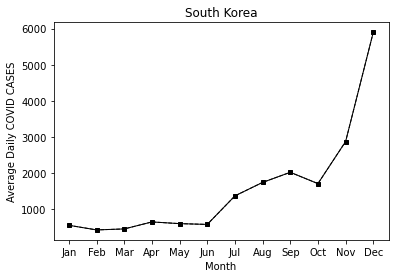

In [539]:
plt.plot( 'month', 'mean', data=statsSK, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsSK, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("South Korea")
plt.show()

In [540]:
ci_lb_ub=[statsSK['lb'],statsSK['ub']]

In [541]:
err = np.abs(ci_lb_ub - statsSK['mean'].to_numpy())

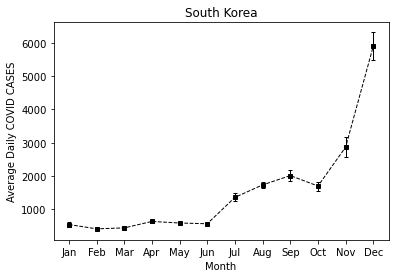

In [542]:
plt.errorbar('month', 'mean',  yerr=err, data=statsSK,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("South Korea")
plt.show()

We will do the same but for 2021 so we can be able to compare between both years

In [543]:
statsSK21=statsdcases[(statsdcases['country']=='South Korea')
                       & (statsdcases['year']==2021)]
statsSK21

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
3684  South Korea  2021   Jan   539.967742   174.473395  31.0   475.970384   
3685  South Korea  2021   Feb   411.535714    85.023954  28.0   378.566867   
3686  South Korea  2021   Mar   438.967742    51.100870  31.0   420.223791   
3687  South Korea  2021   Apr   633.166667    93.227228  30.0   598.355048   
3688  South Korea  2021   May   585.967742    83.493506  31.0   555.342077   
3689  South Korea  2021   Jun   564.133333   117.192071  30.0   520.373095   
3690  South Korea  2021   Jul  1356.903226   328.360001  31.0  1236.459805   
3691  South Korea  2021   Aug  1730.903226   270.906670  31.0  1631.533857   
3692  South Korea  2021   Sep  2010.933333   453.940444  30.0  1841.429186   
3693  South Korea  2021   Oct  1697.193548   368.263259  31.0  1562.113494   
3694  South Korea  2021   Nov  2865.466667   829.541325  30.0  2555.710845   
3695  South Korea  2021   Dec  5900.096774  1138.981719  31.0  5482.314907   

                   
        get_ci_ub  
3684   603.965100  
3685   444.504562  
3686   457.711692  
3687   667.978286  
3688   616.593407  
3689   607.893572  
3690  1477.346647  
3691  1830.272594  
3692  2180.437481  
3693  1832.273602  
3694  3175.222488  
3695  6317.878642

In [544]:
statsSK20=statsdcases[(statsdcases['country']=='South Korea')
                       & (statsdcases['year']==2020)]
statsSK20

country  year month      dcases                                \
                                     mean         std  size   get_ci_lb   
3672  South Korea  2020   Jan    1.100000    2.131770  10.0   -0.424977   
3673  South Korea  2020   Feb  108.241379  202.959823  29.0   31.039592   
3674  South Korea  2020   Mar  214.064516  205.026329  31.0  138.860251   
3675  South Korea  2020   Apr   32.933333   29.040914  30.0   22.089278   
3676  South Korea  2020   May   23.516129   16.249864  31.0   17.555631   
3677  South Korea  2020   Jun   44.900000   10.356907  30.0   41.032667   
3678  South Korea  2020   Jul   47.935484   17.946096  31.0   41.352803   
3679  South Korea  2020   Aug  188.580645  137.604209  31.0  138.107014   
3680  South Korea  2020   Sep  123.566667   49.279417  30.0  105.165430   
3681  South Korea  2020   Oct   88.580645   26.303072  31.0   78.932600   
3682  South Korea  2020   Nov  267.233333  148.384794  30.0  211.825541   
3683  South Korea  2020   Dec  874.741935  208.677577  31.0  798.198382   

                  
       get_ci_ub  
3672    2.624977  
3673  185.443167  
3674  289.268781  
3675   43.777389  
3676   29.476627  
3677   48.767333  
3678   54.518165  
3679  239.054276  
3680  141.967903  
3681   98.228690  
3682  322.641126  
3683  951.285489

In [545]:
statsSK20.columns=['country','year','month','mean','std','size','lb','ub']

In [546]:
statsSK21.columns=['country','year','month','mean','std','size','lb','ub']

In [547]:
x=statsSK20['month']
x

3672    Jan
3673    Feb
3674    Mar
3675    Apr
3676    May
3677    Jun
3678    Jul
3679    Aug
3680    Sep
3681    Oct
3682    Nov
3683    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [548]:
y1=statsSK20['mean']
y1

3672      1.100000
3673    108.241379
3674    214.064516
3675     32.933333
3676     23.516129
3677     44.900000
3678     47.935484
3679    188.580645
3680    123.566667
3681     88.580645
3682    267.233333
3683    874.741935
Name: mean, dtype: float64

In [549]:
y2=statsSK21['mean']
y2

3684     539.967742
3685     411.535714
3686     438.967742
3687     633.166667
3688     585.967742
3689     564.133333
3690    1356.903226
3691    1730.903226
3692    2010.933333
3693    1697.193548
3694    2865.466667
3695    5900.096774
Name: mean, dtype: float64

In [550]:
ci_lb_ub20=[statsSK20['lb'],statsSK20['ub']]
err20 = np.abs(ci_lb_ub20 - statsSK20['mean'].to_numpy())

In [551]:
ci_lb_ub21=[statsSK21['lb'],statsSK21['ub']]
err21 = np.abs(ci_lb_ub21 - statsSK21['mean'].to_numpy())

In [552]:
from matplotlib.transforms import Affine2D

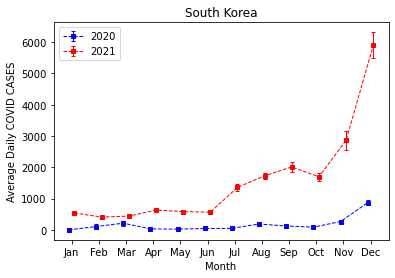

In [553]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsSK20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsSK21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("South Korea")
plt.show()

In South Korea, it is so clear that daily cases were at their peak during Dec 2021 and at their lowest during Jan 2020

Next, we will try to filter Egypt's data

In [554]:
statsEgy=statsdcases[(statsdcases['country']=='Egypt') & (statsdcases['year']==2021)]

In [555]:
statsEgy.columns=['country','year','month','mean','std','size','lb','ub']

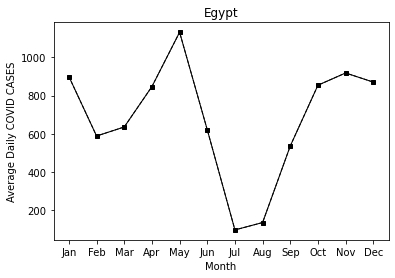

In [556]:
plt.plot( 'month', 'mean', data=statsEgy, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsEgy, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [557]:
ci_lb_ub=[statsEgy['lb'],statsEgy['ub']]

In [558]:
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())

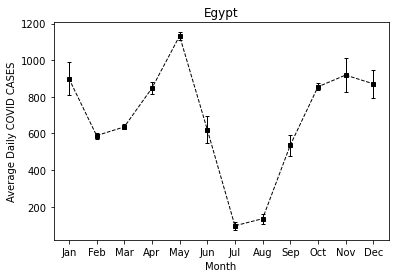

In [559]:
plt.errorbar('month', 'mean',  yerr=err, data=statsEgy,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [560]:
statsEgy21=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2021)]
statsEgy21

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1236   Egypt  2021   Jan   899.645161  251.335970  31.0   807.454383   
1237   Egypt  2021   Feb   588.321429   40.989659  28.0   572.427298   
1238   Egypt  2021   Mar   635.709677   36.309038  31.0   622.391415   
1239   Egypt  2021   Apr   847.366667   92.416405  30.0   812.857814   
1240   Egypt  2021   May  1132.193548   55.087457  31.0  1111.987306   
1241   Egypt  2021   Jun   621.066667  197.770841  30.0   547.217821   
1242   Egypt  2021   Jul    96.129032   61.659139  31.0    73.512277   
1243   Egypt  2021   Aug   134.806452   73.635326  31.0   107.796796   
1244   Egypt  2021   Sep   536.100000  151.276488  30.0   479.612431   
1245   Egypt  2021   Oct   854.612903   53.664189  31.0   834.928720   
1246   Egypt  2021   Nov   918.700000  248.217528  30.0   826.014052   
1247   Egypt  2021   Dec   870.870968  212.967093  31.0   792.754007   

                   
        get_ci_ub  
1236   991.835939  
1237   604.215559  
1238   649.027940  
1239   881.875520  
1240  1152.399791  
1241   694.915513  
1242   118.745787  
1243   161.816107  
1244   592.587569  
1245   874.297087  
1246  1011.385948  
1247   948.987928

In [561]:
statsEgy20=statsdcases[(statsdcases['country']=='Egypt')
                       & (statsdcases['year']==2020)]
statsEgy20

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1224   Egypt  2020   Jan          NaN         NaN   NaN          NaN   
1225   Egypt  2020   Feb     0.062500    0.250000  16.0    -0.070716   
1226   Egypt  2020   Mar    22.870968   20.228267  31.0    15.451179   
1227   Egypt  2020   Apr   160.900000   54.996144  30.0   140.364102   
1228   Egypt  2020   May   627.354839  330.723908  31.0   506.044330   
1229   Egypt  2020   Jun  1444.200000  176.114853  30.0  1378.437633   
1230   Egypt  2020   Jul   831.193548  326.183427  31.0   711.548501   
1231   Egypt  2020   Aug   156.806452   42.607839  31.0   141.177770   
1232   Egypt  2020   Sep   141.966667   23.389481  30.0   133.232891   
1233   Egypt  2020   Oct   140.548387   24.650678  31.0   131.506445   
1234   Egypt  2020   Nov   278.533333   71.137426  30.0   251.970182   
1235   Egypt  2020   Dec   714.548387  354.179036  31.0   584.634468   

                   
        get_ci_ub  
1224          NaN  
1225     0.195716  
1226    30.290756  
1227   181.435898  
1228   748.665347  
1229  1509.962367  
1230   950.838595  
1231   172.435133  
1232   150.700442  
1233   149.590329  
1234   305.096485  
1235   844.462306

In [562]:
statsEgy20.columns=['country','year','month','mean','std','size','lb','ub']

In [563]:
statsEgy21.columns=['country','year','month','mean','std','size','lb','ub']

In [564]:
x=statsEgy20['month']
x

1224    Jan
1225    Feb
1226    Mar
1227    Apr
1228    May
1229    Jun
1230    Jul
1231    Aug
1232    Sep
1233    Oct
1234    Nov
1235    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [565]:
y1=statsEgy20['mean']
y1

1224            NaN
1225       0.062500
1226      22.870968
1227     160.900000
1228     627.354839
1229    1444.200000
1230     831.193548
1231     156.806452
1232     141.966667
1233     140.548387
1234     278.533333
1235     714.548387
Name: mean, dtype: float64

In [566]:
y2=statsEgy21['mean']
y2

1236     899.645161
1237     588.321429
1238     635.709677
1239     847.366667
1240    1132.193548
1241     621.066667
1242      96.129032
1243     134.806452
1244     536.100000
1245     854.612903
1246     918.700000
1247     870.870968
Name: mean, dtype: float64

In [567]:
ci_lb_ub20=[statsEgy20['lb'],statsEgy20['ub']]
err20 = np.abs(ci_lb_ub20 - statsEgy20['mean'].to_numpy())

In [568]:
ci_lb_ub21=[statsEgy21['lb'],statsEgy21['ub']]
err21 = np.abs(ci_lb_ub21 - statsEgy21['mean'].to_numpy())

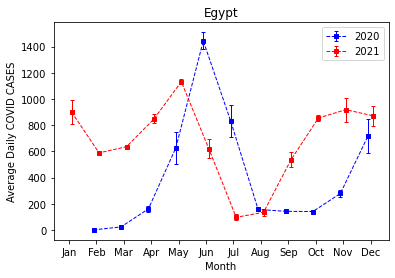

In [569]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsEgy20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsEgy21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

we can track from the graph that in Egypt 2020 (labeled blue) had the highest covid cases in comparison with 2021, the one in red. Also, Feb 2020 has the least number of daily cases. 

Thirdly, we will also try to filter Japan's data and compare 2021 with 2021

In [570]:
statsjapan=statsdcases[(statsdcases['country']=='Japan') & (statsdcases['year']==2021)]

In [571]:
statsjapan.columns=['country','year','month','mean','std','size','lb','ub']

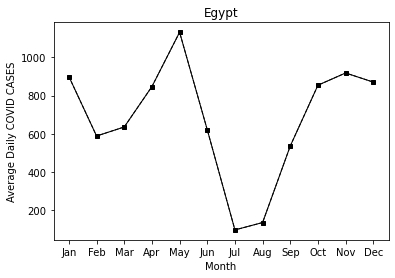

In [572]:
plt.plot( 'month', 'mean', data=statsEgy, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsEgy, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Egypt")
plt.show()

In [573]:
ci_lb_ub=[statsjapan['lb'],statsEgy['ub']]

In [574]:
err = np.abs(ci_lb_ub - statsEgy['mean'].to_numpy())

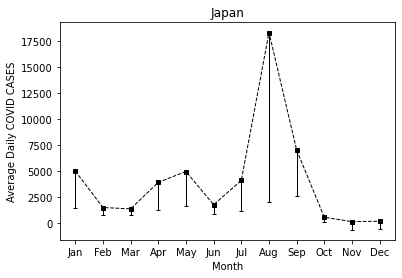

In [575]:
plt.errorbar('month', 'mean',  yerr=err, data=statsjapan,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Japan")
plt.show()

In [576]:
statsjapan21=statsdcases[(statsdcases['country']=='Japan')
                       & (statsdcases['year']==2021)]
statsjapan21

country  year month        dcases                                   \
                                  mean          std  size     get_ci_lb   
2004   Japan  2021   Jan   4999.709677  1556.661475  31.0   4428.721639   
2005   Japan  2021   Feb   1496.285714   523.376775  28.0   1293.341387   
2006   Japan  2021   Mar   1369.354839   488.049215  31.0   1190.336941   
2007   Japan  2021   Apr   3922.833333  1179.424292  30.0   3482.429065   
2008   Japan  2021   May   4958.580645  1353.906540  31.0   4461.963717   
2009   Japan  2021   Jun   1769.866667   552.869925  30.0   1563.421644   
2010   Japan  2021   Jul   4097.451613  3039.684412  31.0   2982.486369   
2011   Japan  2021   Aug  18315.096774  5044.434090  31.0  16464.783412   
2012   Japan  2021   Sep   7023.333333  5442.825276  30.0   4990.948974   
2013   Japan  2021   Oct    557.129032   335.894501  31.0    433.921934   
2014   Japan  2021   Nov    143.100000    58.422569  30.0    121.284654   
2015   Japan  2021   Dec    182.580645    97.970327  31.0    146.644839   

                    
         get_ci_ub  
2004   5570.697716  
2005   1699.230041  
2006   1548.372736  
2007   4363.237602  
2008   5455.197573  
2009   1976.311690  
2010   5212.416857  
2011  20165.410137  
2012   9055.717693  
2013    680.336130  
2014    164.915346  
2015    218.516451

In [577]:
statsjapan20=statsdcases[(statsdcases['country']=='Japan')
                       & (statsdcases['year']==2020)]
statsjapan20

country  year month       dcases                                 \
                                 mean         std  size    get_ci_lb   
1992   Japan  2020   Jan     1.500000    1.715938  10.0     0.272492   
1993   Japan  2020   Feb     7.931034    7.591965  29.0     5.043205   
1994   Japan  2020   Mar    64.838710   55.332990  31.0    44.542405   
1995   Japan  2020   Apr   400.966667  143.180495  30.0   347.502191   
1996   Japan  2020   May    79.258065   70.789815  31.0    53.292151   
1997   Japan  2020   Jun    62.133333   28.085747  30.0    51.645943   
1998   Japan  2020   Jul   569.387097  367.041839  31.0   434.755063   
1999   Japan  2020   Aug  1036.419355  322.038898  31.0   918.294534   
2000   Japan  2020   Sep   506.466667  130.100951  30.0   457.886173   
2001   Japan  2020   Oct   572.387097  151.149744  31.0   516.944923   
2002   Japan  2020   Nov  1583.366667  649.812996  30.0  1340.722506   
2003   Japan  2020   Dec  2804.032258  705.835981  31.0  2545.129530   

                   
        get_ci_ub  
1992     2.727508  
1993    10.818863  
1994    85.135014  
1995   454.431142  
1996   105.223978  
1997    72.620724  
1998   704.019130  
1999  1154.544176  
2000   555.047160  
2001   627.829271  
2002  1826.010827  
2003  3062.934986

In [578]:
statsjapan20.columns=['country','year','month','mean','std','size','lb','ub']

In [579]:
statsjapan21.columns=['country','year','month','mean','std','size','lb','ub']

In [580]:
x=statsjapan20['month']
x

1992    Jan
1993    Feb
1994    Mar
1995    Apr
1996    May
1997    Jun
1998    Jul
1999    Aug
2000    Sep
2001    Oct
2002    Nov
2003    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [581]:
y1=statsjapan20['mean']
y1

1992       1.500000
1993       7.931034
1994      64.838710
1995     400.966667
1996      79.258065
1997      62.133333
1998     569.387097
1999    1036.419355
2000     506.466667
2001     572.387097
2002    1583.366667
2003    2804.032258
Name: mean, dtype: float64

In [582]:
y2=statsjapan21['mean']
y2

2004     4999.709677
2005     1496.285714
2006     1369.354839
2007     3922.833333
2008     4958.580645
2009     1769.866667
2010     4097.451613
2011    18315.096774
2012     7023.333333
2013      557.129032
2014      143.100000
2015      182.580645
Name: mean, dtype: float64

In [583]:
ci_lb_ub20=[statsEgy20['lb'],statsjapan20['ub']]
err20 = np.abs(ci_lb_ub20 - statsjapan20['mean'].to_numpy())

In [584]:
ci_lb_ub21=[statsEgy21['lb'],statsjapan21['ub']]
err21 = np.abs(ci_lb_ub21 - statsjapan21['mean'].to_numpy())

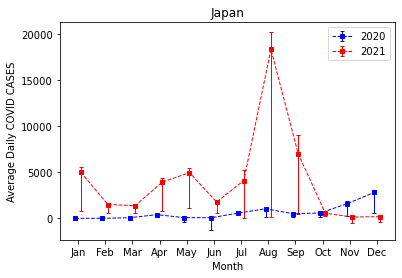

In [585]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsjapan20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsjapan21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Japan")
plt.show()

The results here show that August 2021 had the highest daily average.

Finally, we will filter the U.S. Data

In [586]:
statsus=statsdcases[(statsdcases['country']=='United States') & (statsdcases['year']==2021)]

In [587]:
statsus.columns=['country','year','month','mean','std','size','lb','ub']

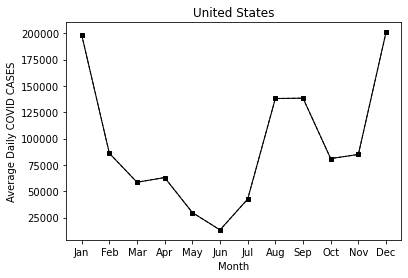

In [588]:
plt.plot( 'month', 'mean', data=statsus, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsus, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("United States")
plt.show()

In [589]:
ci_lb_ub=[statsus['lb'],statsus['ub']]

In [590]:
err = np.abs(ci_lb_ub - statsus['mean'].to_numpy())

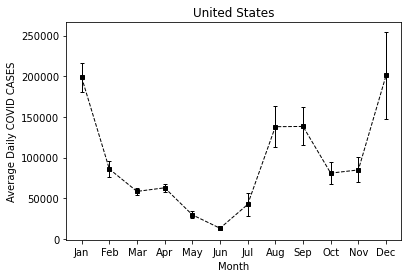

In [591]:
plt.errorbar('month', 'mean',  yerr=err, data=statsus,marker='s', capsize=2,
             color='black', markersize=4, linewidth=1, linestyle='--')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("United States")
plt.show()

In [592]:
statsus21=statsdcases[(statsdcases['country']=='United States')
                       & (statsdcases['year']==2021)]
statsus21

country  year month         dcases                       \
                                          mean            std  size   
4284  United States  2021   Jan  198456.967742   48963.656236  31.0   
4285  United States  2021   Feb   86034.071429   24096.956170  28.0   
4286  United States  2021   Mar   58528.870968   11091.423385  31.0   
4287  United States  2021   Apr   62969.866667   13326.331302  30.0   
4288  United States  2021   May   29748.451613   11654.944186  31.0   
4289  United States  2021   Jun   13276.666667    5477.556971  30.0   
4290  United States  2021   Jul   42530.096774   38371.307282  31.0   
4291  United States  2021   Aug  138009.096774   68559.671456  31.0   
4292  United States  2021   Sep  138317.533333   62395.681666  30.0   
4293  United States  2021   Oct   80985.838710   36717.953309  31.0   
4294  United States  2021   Nov   84910.333333   41307.383674  30.0   
4295  United States  2021   Dec  200893.903226  144836.878947  31.0   

                                    
          get_ci_lb      get_ci_ub  
4284  180496.953637  216416.981847  
4285   76690.247272   95377.895585  
4286   54460.504025   62597.237911  
4287   57993.732778   67946.000555  
4288   25473.383571   34023.519655  
4289   11231.313279   15322.020054  
4290   28455.387633   56604.805916  
4291  112861.206256  163156.987292  
4292  115018.602892  161616.463775  
4293   67517.584702   94454.092718  
4294   69485.902776  100334.763891  
4295  147767.307118  254020.499334

In [593]:
statsus20=statsdcases[(statsdcases['country']=='United States')
                       & (statsdcases['year']==2020)]
statsus20

country  year month         dcases                      \
                                          mean           std  size   
4272  United States  2020   Jan       0.800000      1.032796  10.0   
4273  United States  2020   Feb       0.586207      1.592779  29.0   
4274  United States  2020   Mar    6195.290323   8136.094990  31.0   
4275  United States  2020   Apr   29444.100000   2951.205287  30.0   
4276  United States  2020   May   22969.967742   3675.815070  31.0   
4277  United States  2020   Jun   28578.800000   9530.864738  30.0   
4278  United States  2020   Jul   61294.677419   7287.514718  31.0   
4279  United States  2020   Aug   48365.354839   9820.975222  31.0   
4280  United States  2020   Sep   39903.100000   6415.896956  30.0   
4281  United States  2020   Oct   61870.935484  16595.228308  31.0   
4282  United States  2020   Nov  149008.633333  33377.003387  30.0   
4283  United States  2020   Dec  211725.193548  33854.121304  31.0   

                                    
          get_ci_lb      get_ci_ub  
4272       0.061183       1.538817  
4273      -0.019654       1.192068  
4274    3210.946587    9179.634058  
4275   28342.101835   30546.098165  
4276   21621.667889   24318.267595  
4277   25019.916618   32137.683382  
4278   58621.595440   63967.759399  
4279   44762.992044   51967.717633  
4280   37507.364704   42298.835296  
4281   55783.756596   67958.114371  
4282  136545.455442  161471.811224  
4283  199307.401601  224142.985496

In [594]:
statsus20.columns=['country','year','month','mean','std','size','lb','ub']

In [595]:
statsus21.columns=['country','year','month','mean','std','size','lb','ub']

In [596]:
x=statsus20['month']
x

4272    Jan
4273    Feb
4274    Mar
4275    Apr
4276    May
4277    Jun
4278    Jul
4279    Aug
4280    Sep
4281    Oct
4282    Nov
4283    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [597]:
y1=statsus20['mean']
y1

4272         0.800000
4273         0.586207
4274      6195.290323
4275     29444.100000
4276     22969.967742
4277     28578.800000
4278     61294.677419
4279     48365.354839
4280     39903.100000
4281     61870.935484
4282    149008.633333
4283    211725.193548
Name: mean, dtype: float64

In [598]:
y2=statsus21['mean']
y2

4284    198456.967742
4285     86034.071429
4286     58528.870968
4287     62969.866667
4288     29748.451613
4289     13276.666667
4290     42530.096774
4291    138009.096774
4292    138317.533333
4293     80985.838710
4294     84910.333333
4295    200893.903226
Name: mean, dtype: float64

In [599]:
ci_lb_ub20=[statsus20['lb'],statsus20['ub']]
err20 = np.abs(ci_lb_ub20 - statsus20['mean'].to_numpy())

In [600]:
ci_lb_ub21=[statsus21['lb'],statsus21['ub']]
err21 = np.abs(ci_lb_ub21 - statsus21['mean'].to_numpy())

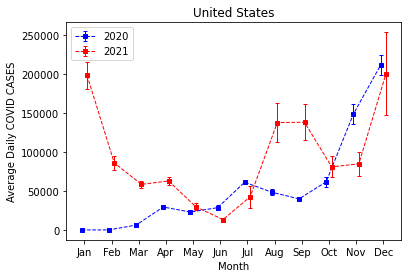

In [601]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsus20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsus21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("United States")
plt.show()

The last graph shows that as a whole 2021 has more daily cases than 2020 in America.

The End